In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# starting url for weather map API call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
#create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high = 180.000, size = 1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
#Create a list for holding the cities

cities = []

#identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)


640

In [6]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging

print("Beginning Data Retrieval      ")

print("------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list.
for i, city in enumerate(cities):
    
    
    #group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count =1
        time.sleep(60)
        
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%y-%m-%d %H:%M:S")
        
        #append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    #if an error is experienced, skip the city,
    except:
        print("City not found. Skipping ...")
        pass

#Indicate that Data Loading is complete.
print("------------------------------")

print("Data Retrieval Complete       ")

print("------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | rapar
Processing Record 2 of Set 1 | cabra
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | najran
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | neuquen
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | yeppoon
Processing Record 15 of Set 1 | amapa
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | asau
Processing Record 18 of Set 1 | lerwick
Processing Record 19 of Set 1 | abay
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | hendijan
City not found. Skipping ...
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Pro

Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | alekseyevka
Processing Record 44 of Set 4 | east hartford
Processing Record 45 of Set 4 | bonfim
Processing Record 46 of Set 4 | bollnas
Processing Record 47 of Set 4 | xai-xai
Processing Record 48 of Set 4 | ngunguru
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | teguise
Processing Record 2 of Set 5 | baykit
Processing Record 3 of Set 5 | dekar
Processing Record 4 of Set 5 | samana
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | udarnyy
Processing Record 8 of Set 5 | batagay
Processing Record 9 of Set 5 | santiago de cao
Processing Record 10 of Set 5 | oshogbo
Processing Record 11 of Set 5 | zlatica
Processing Record 12 of Set 5 | pacific grove
Processing Record 13 of Set 5 | lumsden
Processing Rec

Processing Record 27 of Set 8 | jalu
Processing Record 28 of Set 8 | steamboat springs
Processing Record 29 of Set 8 | dolores hidalgo
Processing Record 30 of Set 8 | kawalu
Processing Record 31 of Set 8 | mehamn
Processing Record 32 of Set 8 | petrokamenskoye
Processing Record 33 of Set 8 | viiratsi
Processing Record 34 of Set 8 | andilamena
Processing Record 35 of Set 8 | kudahuvadhoo
Processing Record 36 of Set 8 | valdepenas
Processing Record 37 of Set 8 | langres
Processing Record 38 of Set 8 | elko
Processing Record 39 of Set 8 | qiongshan
Processing Record 40 of Set 8 | inhambane
Processing Record 41 of Set 8 | norrtalje
Processing Record 42 of Set 8 | ashqelon
Processing Record 43 of Set 8 | letka
Processing Record 44 of Set 8 | san andres
Processing Record 45 of Set 8 | ukiah
Processing Record 46 of Set 8 | coahuayana
Processing Record 47 of Set 8 | laguna
Processing Record 48 of Set 8 | yar-sale
Processing Record 49 of Set 8 | bethel
Processing Record 50 of Set 8 | samusu
Cit

Processing Record 12 of Set 12 | hasaki
Processing Record 13 of Set 12 | bairiki
Processing Record 14 of Set 12 | kangalassy
Processing Record 15 of Set 12 | palmer
Processing Record 16 of Set 12 | jizan
Processing Record 17 of Set 12 | north bend
Processing Record 18 of Set 12 | bull savanna
Processing Record 19 of Set 12 | esperance
Processing Record 20 of Set 12 | mount isa
Processing Record 21 of Set 12 | dunedin
Processing Record 22 of Set 12 | sembakung
Processing Record 23 of Set 12 | yeehaw junction
City not found. Skipping ...
Processing Record 24 of Set 12 | entebbe
Processing Record 25 of Set 12 | tabuk
Processing Record 26 of Set 12 | noumea
Processing Record 27 of Set 12 | bontang
Processing Record 28 of Set 12 | qurayyat
Processing Record 29 of Set 12 | shakhunya
Processing Record 30 of Set 12 | koygorodok
Processing Record 31 of Set 12 | mendahara
City not found. Skipping ...
Processing Record 32 of Set 12 | kiama
Processing Record 33 of Set 12 | matara
Processing Record

In [7]:
len(city_data)

582

In [8]:
#conver the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rapar,23.5667,70.6333,82.13,73,5,21.99,IN,22-06-03 18:44:S
1,Cabra,37.4725,-4.4421,72.95,40,0,10.38,ES,22-06-03 18:44:S
2,Bredasdorp,-34.5322,20.0403,52.20,85,100,4.34,ZA,22-06-03 18:44:S
3,Lebu,-37.6167,-73.6500,51.71,95,100,20.56,CL,22-06-03 18:44:S
4,Najran,17.4924,44.1277,84.85,22,5,7.43,SA,22-06-03 18:44:S
5,Kavieng,-2.5744,150.7967,80.83,75,69,10.63,PG,22-06-03 18:44:S
6,Provideniya,64.3833,-173.3000,48.31,61,100,4.07,RU,22-06-03 18:44:S
7,Rikitea,-23.1203,-134.9692,76.62,74,100,14.23,PF,22-06-03 18:44:S
8,Neuquen,-38.9516,-68.0591,44.49,65,0,3.44,AR,22-06-03 18:44:S
9,Busselton,-33.6500,115.3333,55.54,72,74,7.87,AU,22-06-03 18:44:S


In [10]:
#rearrange the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rapar,IN,22-06-03 18:44:S,23.5667,70.6333,82.13,73,5,21.99
1,Cabra,ES,22-06-03 18:44:S,37.4725,-4.4421,72.95,40,0,10.38
2,Bredasdorp,ZA,22-06-03 18:44:S,-34.5322,20.0403,52.20,85,100,4.34
3,Lebu,CL,22-06-03 18:44:S,-37.6167,-73.6500,51.71,95,100,20.56
4,Najran,SA,22-06-03 18:44:S,17.4924,44.1277,84.85,22,5,7.43


In [11]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

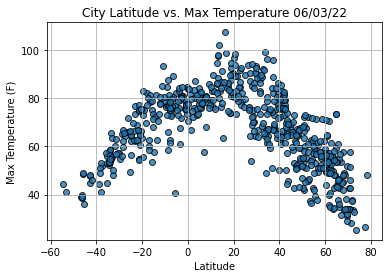

In [14]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker ="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

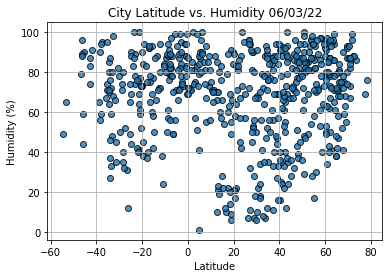

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

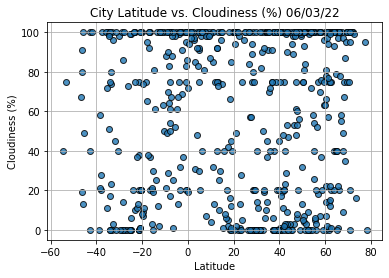

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

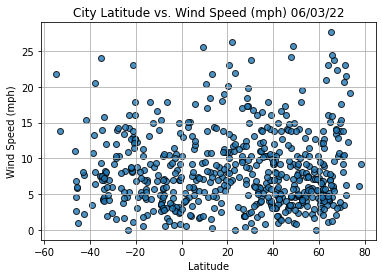

In [17]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()